# Exploring Reinforcement Learning Policies in the Four Room Environment

In [1]:
#Import the necessary packages
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm

# 1. Implementation of the Four Rooms Environment

- The FourRooms is implemented as a Python class. The attributes and methods are described as follows:
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
    - **take_action** function: Takes the current state and one action, returns the next state if it's in the state space.


In [2]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]


    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward


    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """

        # Stochastic dynamics:
        # 80% probability to move in the intended direction
        # 10% probability each to move in one of the two perpendicular directions
        rand_num = random.random()

        if rand_num < 0.8:
            # Move in the intended direction
            next_state = self.take_action(state, act)
        else:
            # Select one of the perpendicular actions with 10% probability
            if act == "UP" or act == "DOWN":
                # For UP or DOWN, the perpendicular directions are LEFT and RIGHT
                perpendicular_action = random.choice(["LEFT", "RIGHT"])
            else:
                # For LEFT or RIGHT, the perpendicular directions are UP and DOWN
                perpendicular_action = random.choice(["UP", "DOWN"])

            # Apply the perpendicular action
            next_state = self.take_action(state, perpendicular_action)

        # Determine the reward:
        # If the agent reaches the goal state (10, 10), return reward +1 and reset the agent to start state
        if next_state == self.goal_state:
            reward = 1
            next_state = self.start_state  # Reset agent to start after reaching goal
        else:
            reward = 0  # No reward for other states

        # Return the next state and the reward
        return next_state, reward


    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [3]:
"""Here is the plot function to be used to generate the figure."""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))

    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2. Implementation of the Manual Policy

In [9]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction

    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 30

    # create a loop
    for t in range(time_step):

        # Manual agent/policy function: take input from the user
        action = input(f"You're in state {state}. Enter action (UP, DOWN, LEFT, RIGHT): ").upper()

        # Interact with the environment
        next_state, reward = env.step(state, action)

        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")

        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

You're in state [0, 0]. Enter action (UP, DOWN, LEFT, RIGHT): up
Step = 0, state = [0, 0], action = UP, next state = [1, 0], reward = 0
You're in state [1, 0]. Enter action (UP, DOWN, LEFT, RIGHT): right
Step = 1, state = [1, 0], action = RIGHT, next state = [2, 0], reward = 0
You're in state [2, 0]. Enter action (UP, DOWN, LEFT, RIGHT): right
Step = 2, state = [2, 0], action = RIGHT, next state = [3, 0], reward = 0
You're in state [3, 0]. Enter action (UP, DOWN, LEFT, RIGHT): right
Step = 3, state = [3, 0], action = RIGHT, next state = [3, 1], reward = 0
You're in state [3, 1]. Enter action (UP, DOWN, LEFT, RIGHT): right
Step = 4, state = [3, 1], action = RIGHT, next state = [4, 1], reward = 0
You're in state [4, 1]. Enter action (UP, DOWN, LEFT, RIGHT): right
Step = 5, state = [4, 1], action = RIGHT, next state = [5, 1], reward = 0
You're in state [5, 1]. Enter action (UP, DOWN, LEFT, RIGHT): right
Step = 6, state = [5, 1], action = RIGHT, next state = [6, 1], reward = 0
You're in st

# 3. Implemention of the Random Policy

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Run trial: 100%|██████████| 10/10 [00:01<00:00,  9.15it/s]


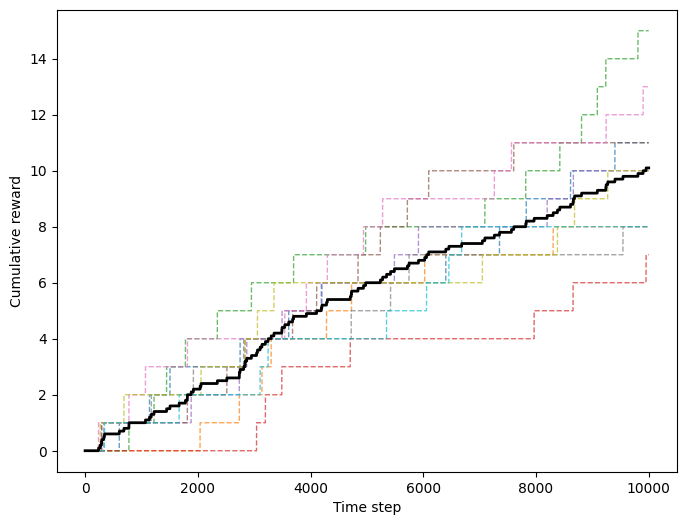

In [16]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(10e3)

    # save the rewards for plot
    rewards_list = []

    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):

        # reset for every trail
        reward_per_trial = []
        reward_counter = 0

        # reset the environment
        state, reward = env.reset()

        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):


            # Random Policy: obtain a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])

            # Interact with the environment: get the next state and reward
            next_state, reward = env.step(state, action)

            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)

            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)

# PLOT THE RESULTS
plot_func(rewards_list)

# 4. Implementation of Better & Worse Policies against the Random Policy


Running trials for Random policy...


Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Run Random trial: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]



Running trials for Worse policy...


Run Worse trial: 100%|██████████| 10/10 [00:01<00:00,  7.38it/s]



Running trials for Better policy...


Run Better trial: 100%|██████████| 10/10 [00:01<00:00,  7.09it/s]


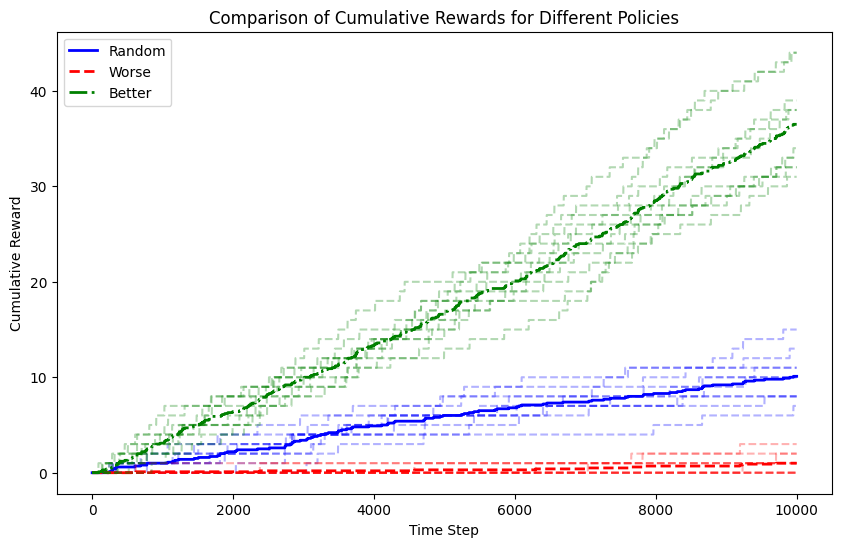

In [19]:
# Define the worse policy with the given custom probabilities
def worse_policy():
    actions = ["LEFT", "RIGHT", "UP", "DOWN"]
    probabilities = [0.3, 0.2, 0.25, 0.25]  # Biases the actions
    return random.choices(actions, probabilities)[0]

# Define the better policy with the given custom probabilities
def better_policy():
    actions = ["UP", "RIGHT", "LEFT", "DOWN"]
    probabilities = [0.4, 0.3, 0.15, 0.15]  # Favors up and right
    return random.choices(actions, probabilities)[0]

# Define the random policy (uniform random selection)
def random_policy():
    return random.choice(["UP", "DOWN", "LEFT", "RIGHT"])

# Plot all trials for each policy on a single graph
def plot_combined_policies(rewards_results):
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Define colors and line styles for the different policies
    colors = {'Random': 'b', 'Worse': 'r', 'Better': 'g'}
    linestyles = {'Random': '-', 'Worse': '--', 'Better': '-.'}

    # Plot each policy's individual trial curves and mean cumulative reward
    for policy_name, rewards in rewards_results.items():
        # Plot all 10 trials as dotted lines
        for trial in rewards:
            plt.plot(range(len(trial)), trial, linestyle='--', color=colors[policy_name], alpha=0.3)

        # Calculate the mean cumulative reward across trials
        mean_reward = np.mean(rewards, axis=0)

        # Plot the mean cumulative reward curve as a solid line
        plt.plot(range(len(mean_reward)), mean_reward, label=policy_name,
                 color=colors[policy_name], linestyle=linestyles[policy_name], linewidth=2)

    # Add labels, title, and legend
    plt.xlabel("Time Step")
    plt.ylabel("Cumulative Reward")
    plt.title("Comparison of Cumulative Rewards for Different Policies")
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # Create the environment
    env = FourRooms()

    # Number of trials and length of each trial
    trial_num = 10
    trial_length = int(1e4)

    # Store rewards for each policy
    policy_names = ['Random', 'Worse', 'Better']
    rewards_results = {policy: [] for policy in policy_names}

    # Define the policy functions
    policies = {'Random': random_policy, 'Worse': worse_policy, 'Better': better_policy}

    # Run experiments for each policy
    for policy_name, policy_fn in policies.items():
        print(f"\nRunning trials for {policy_name} policy...")

        # Run experiment for each trial
        for e in tqdm(range(trial_num), desc=f"Run {policy_name} trial", position=0):

            # Reset rewards for the current trial
            reward_per_trial = []
            reward_counter = 0

            # Reset the environment
            state, reward = env.reset()

            # Run each trial
            for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):

                # Get action from the current policy
                action = policy_fn()

                # Get the next state and reward from the environment
                next_state, reward = env.step(state, action)

                # Save the cumulative reward
                reward_counter += reward
                reward_per_trial.append(reward_counter)

                # Reset the environment if the agent reaches the goal
                if reward == 1:
                    state, reward = env.reset()
                else:
                    state = next_state

            # Save the rewards for the current policy and trial
            rewards_results[policy_name].append(reward_per_trial)

    # Plot all policies with individual trial curves and mean curves
    plot_combined_policies(rewards_results)
